Zaur Gouliev 18718545 
Sean Moiselle 17461824

*No accompanying documentation*

# Task 1: Running various sorting Algorithms

### This is a simple method that takes size as an input paramater and outputs a list that has elements in descending order from size-1 to 0.

In [1]:
# Lets first import all our packages we need for this task
import random as random
from time import perf_counter
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

Create a random generated list in reverse order

In [2]:
def getList(size):
    random_list = []
    for i in range (0,size):
        random_list.append(i)
    
    return list(reversed(random_list))

Bubblesort algo

In [3]:
def bubble_sort(arr):
    arr_size = len(arr)
    for i in range(arr_size):
        for j in range(i, arr_size):
            if arr[i] > arr[j]:
                arr[i], arr[j] = arr[j], arr[i]
    
    return arr

Quicksort algo


In [4]:
def partition(arr, low, high):
    """Return a pivot element for the quicksort results"""
    key = arr[high]
    pivot = low
    for i in range(low, high):
        if arr[i] <= key:
            arr[i], arr[pivot] = arr[pivot], arr[i]
            pivot += 1
    arr[pivot], arr[high] = arr[high], arr[pivot]
    return pivot

def quicksort(arr, low=0, high=None):
    if high is None:
        high = len(arr)-1

    if high < low:
        return
    else:
        pivot = partition(arr, low, high)
        quicksort(arr, low, pivot-1)
        quicksort(arr, pivot+1, high)
        
def quick_sort_simple(data):
    if len(data) > 1:
        less = []
        equal = []
        greater = []
        pivot = data[0]
        
        for x in data:
            if x < pivot:
                less.append(x)
            elif x == pivot:
                equal.append(x)
            else:
                greater.append(x)
        
        return quick_sort_simple(less) + equal + quick_sort_simple(greater)
    else:
        return data

Mergesort algo


In [5]:
def merge(left, right):
    result = []
    left_idx, right_idx = 0, 0
    while left_idx < len(left) and right_idx < len(right):
        if left[left_idx] <= right[right_idx]:
            result.append(left[left_idx])
            left_idx += 1
        else:
            result.append(right[right_idx])
            right_idx += 1
    if left:
        result.extend(left[left_idx:])
    if right:
        result.extend(right[right_idx:])
    
    return result

def mergesort(arr):
    if len(arr) <= 1:
        return arr

    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]
    left = mergesort(left)
    right = mergesort(right)
    
    return list(merge(left, right))

# Calculating the time taken to analyse results

### This cell gets lists of sizes from 10 to 2000 and sorts them using the three sorting techniques above while also calculating the time taken for each size by each technique and saving all this information to the dictionary time_taken

In [6]:
time_taken = {'Bubblesort':[], 'Quicksort':[], 'Mergesort':[]}
for i in range (10, 2000):
    orig_list = getList(i)
    
    temp_list = list(orig_list)
    time_start = perf_counter()
    bubble_sort(temp_list)
    time_end = perf_counter()
    time_taken['Bubblesort'].append(time_end - time_start)
    
    temp_list = list(orig_list)
    time_start = perf_counter()
    quick_sort_simple(temp_list)
    time_end = perf_counter()
    time_taken['Quicksort'].append(time_end - time_start)
    
    temp_list = list(orig_list)
    time_start = perf_counter()
    mergesort(temp_list)
    time_end = perf_counter()
    time_taken['Mergesort'].append(time_end - time_start) 

We can now begin plotting the results of the above analysis

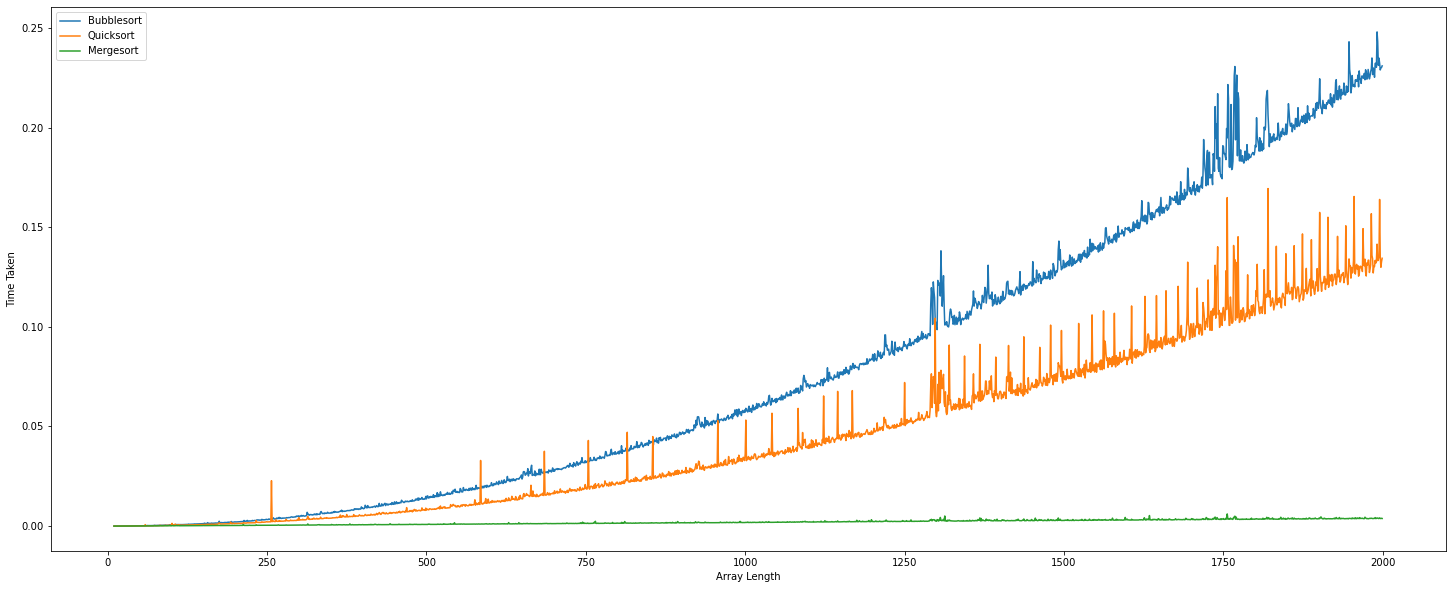

In [9]:
array_lens = list(range(10, 2000))

plt.figure(figsize=(25, 10))

for key, value in time_taken.items():
    plt.plot(array_lens, value, label = key)
plt.xlabel('Array Length')
plt.ylabel('Time Taken')
plt.legend()
plt.show()

### Display each sorting time complexity algorithm individually

In analyzing the running times of each individual sorting algorithm it is important to curve fit them, through visual analysis the following curves were identified: 

    -Linear: O(n)
    -Quadratic: O(n^2)
    -Linearithmic: O(n log n)    

In [10]:
# O(n)
def objective(x, a, b):
    return a * x + b

In [11]:
# O(n^2)
def objective2(x, a, b, c):
    return a * x + b * x**2 + c

In [12]:
def objective3(x, a, b):
    return a * x * np.log2(x) + b

#### Bubblesort

y = -0.00000 * x + 0.00000 * x^2 + -0.00030


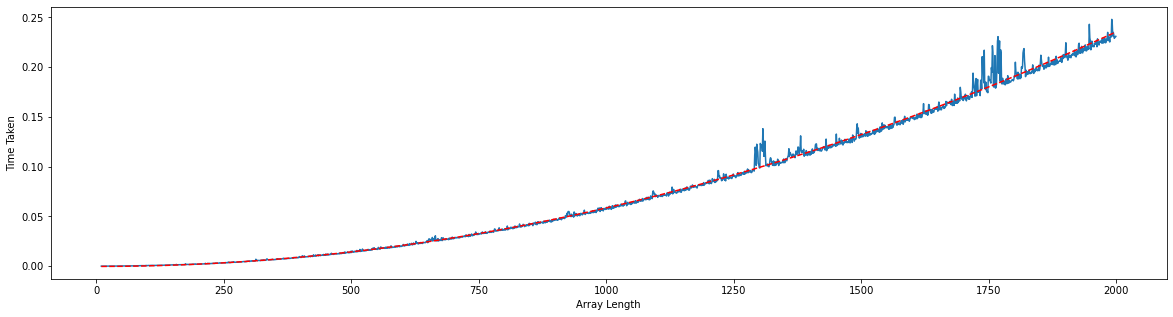

In [13]:
#Quadratic Polynomial 
#Citation: Code Retrieved from https://machinelearningmastery.com/curve-fitting-with-python/
x = array_lens
y = time_taken['Bubblesort']
# curve fit
popt, _ = curve_fit(objective2, x, y)
# summarize the parameter values
a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))
# plot input vs output
plt.figure(figsize=(20,5))
plt.plot(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective2(x_line, a, b, c)
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.xlabel("Array Length")
plt.ylabel("Time Taken")
plt.show()
#plot.savefig("output12[1].jpg")
plt.show()

#### Quicksort

y = -0.00000 * x + 0.00000 * x^2 + 0.00005


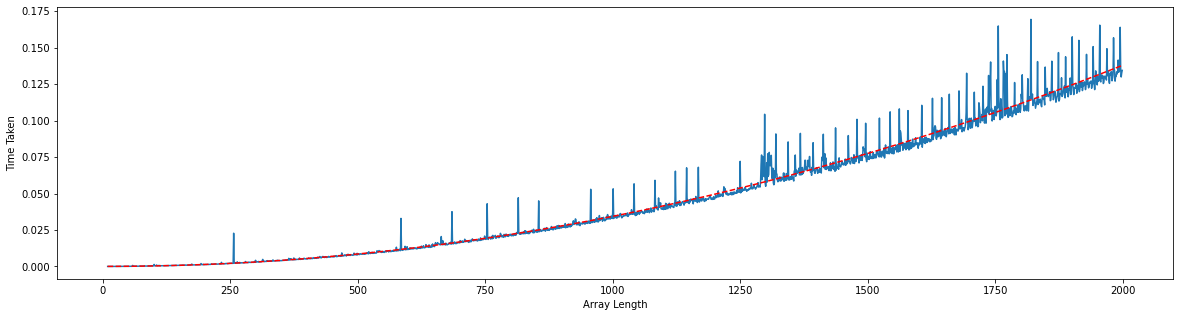

In [14]:
#Quadratic Polynomial 
#Citation: Code Retrieved from https://machinelearningmastery.com/curve-fitting-with-python/
x = array_lens
y = time_taken['Quicksort']
# curve fit
popt, _ = curve_fit(objective2, x, y)
# summarize the parameter values
a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))
# plot input vs output
plt.figure(figsize=(20,5))
plt.plot(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective2(x_line, a, b, c)
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.xlabel("Array Length")
plt.ylabel("Time Taken")
plt.show()
#plot.savefig("output12[1].jpg")
plt.show()

#### Mergesort

for the merge sort we are plotting it against both Linear and Linearithmic time.

y = 0.00000 * x + -0.00010


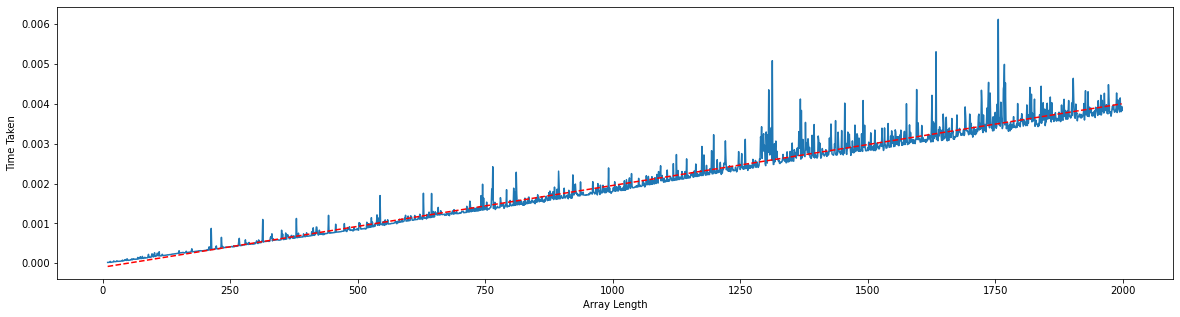

In [15]:
#Linear
#Citation: Code Retrieved from https://machinelearningmastery.com/curve-fitting-with-python/
x = array_lens
y = time_taken['Mergesort']
# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b = popt
print('y = %.5f * x + %.5f' % (a, b))
# plot input vs output
plt.figure(figsize=(20,5))
plt.plot(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b)
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.xlabel("Array Length")
plt.ylabel("Time Taken")
plt.show()
plt.show()

y = 0.00000 * x + 0.00008


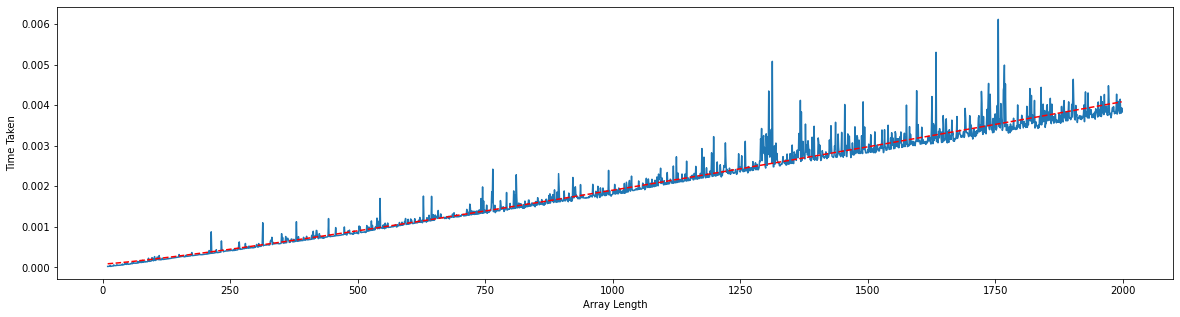

In [16]:
#Linearithmic
#Citation: Code Retrieved from https://machinelearningmastery.com/curve-fitting-with-python/
x = array_lens
y = time_taken['Mergesort']
# curve fit
popt, _ = curve_fit(objective3, x, y)
# summarize the parameter values
a, b = popt
print('y = %.5f * x + %.5f' % (a, b))
# plot input vs output
plt.figure(figsize=(20,5))
plt.plot(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective3(x_line, a, b)
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.xlabel("Array Length")
plt.ylabel("Time Taken")
plt.show()
plt.show()

# Analysis of Section One

                                          **sorting functions an introduction**

Sorting is the process by which a set of objects are rearranged into their correct order. In computer science sorting is 'one of the most important and well-studied problems in computer science'(Dev Mishra & Garg, 2008). Furthermore, in recent years sorting algorithms are garnering momentum in new algorithm development due to the increase in information load (Zutshi & Goswami, 2021). This assignment required us to run and analyze a number of sorting algorithms, the process which was utilized was to create a list from 10 to 2000; reverse the list and finally sort it using a given algorithm.

                                            **Implemented Sorting Algorithms**

The three algorithms which were implemented in this analysis were: 
                                                   
                                                    - Bubblesort
                                                    - Quicksort
                                                    - Mergesort
                                                    
*Bubblesort Theory and Implementation Analysis* 

The bubble sort method which is also known as the adjacent comparison sort is a simple internal exchange sort method (Min, 2010). It is a gradual sequence which checks the values of two neighbours and positions them based on the result of this evaulation.

Bubblesort has a theoretical Big O value, or upper bound of O(n^2) (Min, 2010). As displayed in our own test bubble sort was curve fitted to an O(n^2) in the worst case scenario (values are in complete reverse).

*Quick Sort*

Quick sort is implemented by choosing a pivot, at which point all the elements contained within the set are rearranged around the pivot element in acending order (Zutshi & Goswami, 2021), the pivot is correctly positioned while all elements to its left and right remain unsorted. The quick sort algorithm has a time complexity or Big O of O(n^2) but on average quick sort displays a O(nlogn) time complexity. 

In our implementation we have witnessed a result which is in line with theory. Displaying that our runtimes are congruent with O(n^2) in the worst case scenario. We managed to curve fit Quick sort to a line displaying O(n^2).

*Merge Sort*

The concept of merge sort is an implementation which utilizes a 'divide and conquer' approach, the algorithm will split the list into numerous sublists and merge them back together in a sorted order (Mansoor Sarwar, Jaragh & Wind, 1994). Merge sort has a higher demand on memory with a space complexity of O(n) (Sehgal, 2018), but does have a potential big O of O(n log n) (Mansoor Sarwar, Jaragh & Wind, 1994).

In our implementation of the algorithm we did display a time complexity of O(nlogn), or potentially O(n). It was difficult to differentiate between which line fit the algorithm best, and this is a noted limitation of this research paper is that we could not test against a list of >2000. We believe if we were able to run this algorithm against a larger testing set, the time complexity would become more in line with O(nlogn).

*Comparison of the three Algorithms*

In comparing the three algorithms we must recognize that our implementation of the Quick Sort is recursive, this being the theoretically "optimized" version of quicksort (Mansoor Sarwar, Jaragh & Wind, 1994).Academic studies have displayed that quicksort can be faster than Merge sort on a given dataset  (Mansoor Sarwar, Jaragh & Wind, 1994) however is more volitile in its performance (merge sort has more consistency in being faster, but not always). In this instance quick sort however is magnitudes slower than merge, which will be explored here.

Furthermore it is worth noting that reverse order is considered the 'worst case scenario' for quick sort ("When does the worst case of Quicksort occur? - GeeksforGeeks", 2021), but not for merge sort. Mergesort's worst case scenario is in the event that the data set is in such a position that the left and the right split contain alternating elements ("When Will the Worst Case of Merge Sort Occur?", 2021). For example, the left array contains [1,3,5,7] and the right contains [2,4,6,8]. This results in every element in both arrays needing to be compared at least once, undermining the efficiencies for merge sort.

Therefore this test is not a fully 'fair' way to compare the two sorting algorithms. Thus displaying that the choice of sorting algorithms depends on the structure of the dataset, displaying there is no one 'true' best sorting algorithm.

These optimization and testing issues however did not creat enough overhead to slow quicksort down to such a degree that it was slower than Bubblesort. Therefore displaying how inefficient bubblesort is in terms of time complexity, and displaying the theoretical prowess of quicksort. Bubblesort does not have these caveats, as its worst case scenario is reverse order and it does not require recursion optimization.


# References of Section One

Dev Mishra, A., & Garg, D. (2008). Selection of Best Sorting Algorithm. International Journal Of Intelligent Information Processing, 2, 363-368.

Zutshi, A., & Goswami, D. (2021). Systematic review and exploration of new avenues for sorting algorithm. International Journal Of Information Management Data Insights, 1(2), 100042. doi: 10.1016/j.jjimei.2021.100042

Min, W. (2010). Analysis on Bubble Sort Algorithm Optimization. 2010 International Forum On Information Technology And Applications. doi: 10.1109/ifita.2010.9

Mansoor Sarwar, S., Jaragh, M., & Wind, M. (1994). An empirical study of the run-time behavior of quicksort, Shellsort and mergesort for medium to large size data. Computer Languages, 20(2), 127-134. doi: 10.1016/0096-0551(94)90019-1

Sehgal, K. (2018). A Simplified Explanation of Merge Sort. Retrieved 24 April 2022, from https://medium.com/karuna-sehgal/a-simplified-explanation-of-merge-sort-77089fe03bb2#:~:text=Overall%20time%20complexity%20of%20Merge,for%20the%20last%20data%20sets%20.

When does the worst case of Quicksort occur? - GeeksforGeeks. (2021). Retrieved 25 April 2022, from https://www.geeksforgeeks.org/when-does-the-worst-case-of-quicksort-occur/

When Will the Worst Case of Merge Sort Occur?. (2021). Retrieved 25 April 2022, from https://www.baeldung.com/cs/merge-sort-time-complexity
